In [1]:
import numpy as np
import pandas as pd
import sklearn
 
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
 
# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
 
# Modèles de Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import joblib
from sklearn.tree import export_text
 
# Évaluation des modèles
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score
)

In [2]:
data = pd.read_csv("Clean_Dataset.csv")

print(data.head(10))

column_nan_count = data.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   
5           5   Vistara   UK-945       Delhi        Morning  zero   
6           6   Vistara   UK-927       Delhi        Morning  zero   
7           7   Vistara   UK-951       Delhi      Afternoon  zero   
8           8  GO_FIRST   G8-334       Delhi  Early_Morning  zero   
9           9  GO_FIRST   G8-336       Delhi      Afternoon  zero   

    arrival_time destination_city class_ticket  duration  days_left  price  
0          Night           Mumbai      Economy      2.17          1   5953  
1        Morning           Mumbai      Economy      2.33          1   5953  
2  Early_

In [3]:
print(data.describe())

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


In [4]:
print(data.info())

<class 'pandas.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  str    
 2   flight            300153 non-null  str    
 3   source_city       300153 non-null  str    
 4   departure_time    300153 non-null  str    
 5   stops             300153 non-null  str    
 6   arrival_time      300153 non-null  str    
 7   destination_city  300153 non-null  str    
 8   class_ticket      300153 non-null  str    
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), str(8)
memory usage: 42.9 MB
None


# Colonnes :
    - Unnamed: index, int (TO DELETE)
    - airline : nom compagnie aérienne, char (MAYBE to delete)
    - flight : numéro de vol, char composé de chiffres et de lettres "ex : AA1234" (TO DELETE)
    - source_city : aéroport de départ, char
    - departure_time : heure de départ, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - stop : nombre d'escales, int
    - arrival_time : heure d'arrivée, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - destination_city : aéroport d'arrivée, char
    - class : classe de voyage, char ("Business", "Economy", "Economy Plus")
    - duration : durée du vol en minutes, flot
    - days_left : nombre de jours avant le départ, int
    - price : prix du billet, int = rupies indiennes

In [5]:
df = data.drop(columns=['Unnamed: 0'], inplace=False)
df = df.drop(columns=['flight'], inplace=False)
# df = df.drop(columns=['airline'], inplace=False)

## Duplicates et valeurs manquantes

In [6]:
duplicate_count = df.duplicated().sum()
missing_values = df.isnull().sum()
print(f"Nombre de doublons : {duplicate_count}")
print("Valeurs manquantes par colonne :")
print(missing_values)

Nombre de doublons : 2213
Valeurs manquantes par colonne :
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class_ticket        0
duration            0
days_left           0
price               0
dtype: int64


In [7]:
df.drop_duplicates(inplace=True)
duplicate_count_after = df.duplicated().sum()
print(f"Nombre de doublons après suppression : {duplicate_count_after}")

df.dropna(subset=['price'],inplace=True)
print(f"Nombre de vols sans prix : {df['price'].isnull().sum()}")

Nombre de doublons après suppression : 0
Nombre de vols sans prix : 0


### Grape pour voir les données aberrantes et la distribution des données

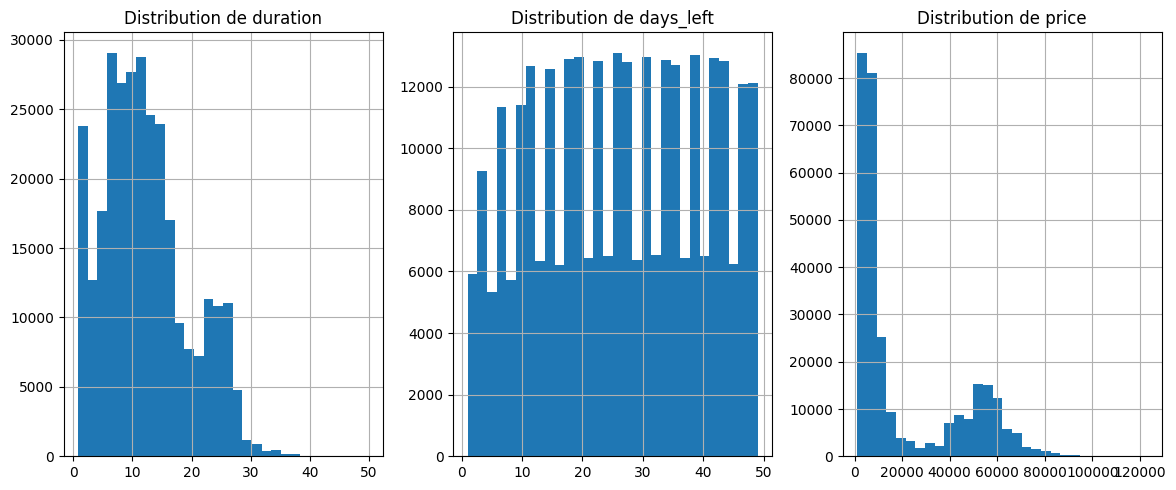

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.hist(column='duration', bins=30, ax=axes[0])
df.hist(column='days_left', bins=30, ax=axes[1])
df.hist(column='price', bins=30, ax=axes[2])
axes[0].set_title('Distribution de duration')
axes[1].set_title('Distribution de days_left')
axes[2].set_title('Distribution de price')
plt.tight_layout()
plt.show()

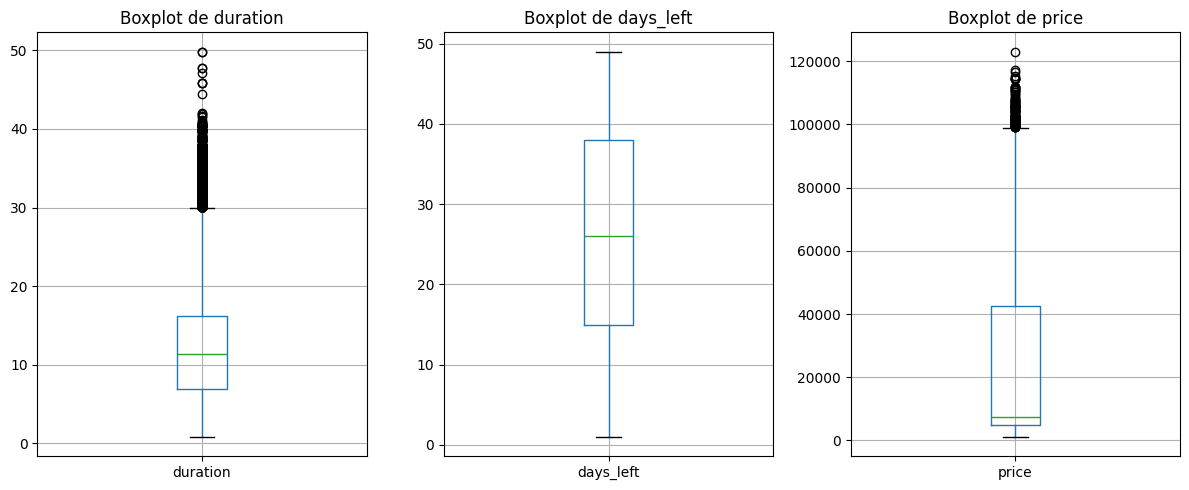

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.boxplot(column='duration', ax=axes[0])
df.boxplot(column='days_left', ax=axes[1])
df.boxplot(column='price', ax=axes[2])
axes[0].set_title('Boxplot de duration')
axes[1].set_title('Boxplot de days_left') 
axes[2].set_title('Boxplot de price') 
plt.tight_layout()
plt.show()

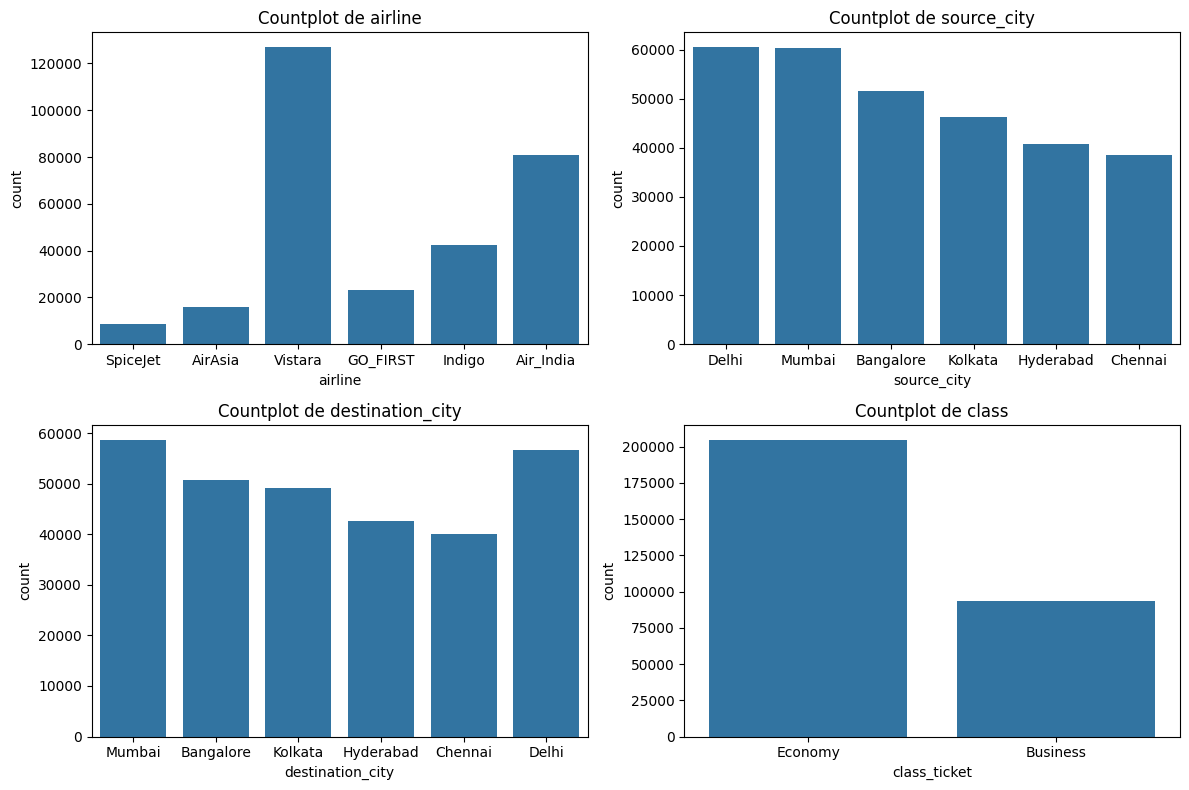

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x=df['source_city'], ax=axes[0, 1])
axes[0, 1].set_title('Countplot de source_city')
sns.countplot(x=df['destination_city'], ax=axes[1, 0])
axes[1, 0].set_title('Countplot de destination_city')
sns.countplot(x=df['class_ticket'], ax=axes[1, 1])
axes[1, 1].set_title('Countplot de class')
sns.countplot(x=df['airline'], ax=axes[0, 0])
axes[0, 0].set_title('Countplot de airline')
plt.tight_layout()
plt.show()

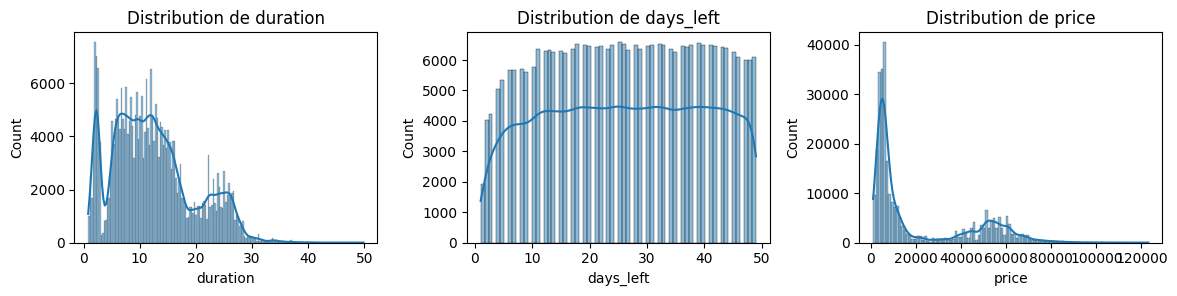

In [11]:
df_num = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_num.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_num[column], kde=True)
    plt.title(f'Distribution de {column}')
plt.tight_layout()
plt.show()

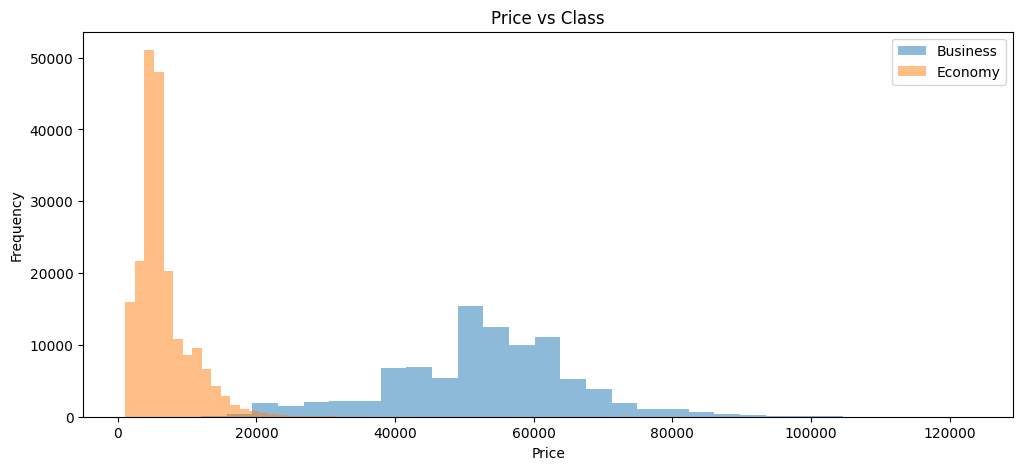

In [12]:
plt.figure(figsize=(12, 5))
pyplot.hist(df[df['class_ticket'] == 'Business']['price'], bins=30, alpha=0.5, label='Business')
pyplot.hist(df[df['class_ticket'] == 'Economy']['price'], bins=30, alpha=0.5, label='Economy')
plt.title('Price vs Class')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

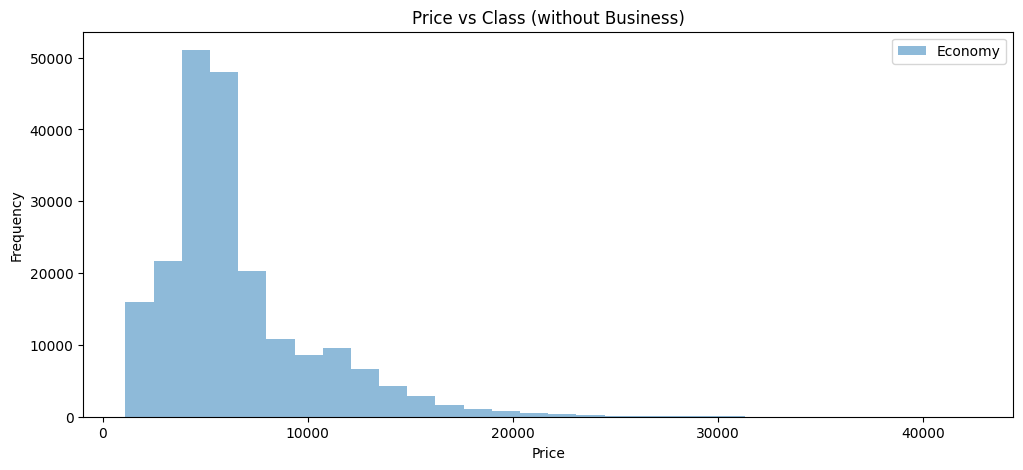

In [13]:
df_no_business = df[df['class_ticket'] != 'Business']
plt.figure(figsize=(12, 5))
pyplot.hist(df_no_business[df_no_business['class_ticket'] == 'Economy']['price'], bins=30, alpha=0.5, label='Economy')
plt.title('Price vs Class (without Business)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Example avec la transformation des categories avec OrdinalEncoder et la visualisation de la distribution des prix en fonction de la classe de voyage :

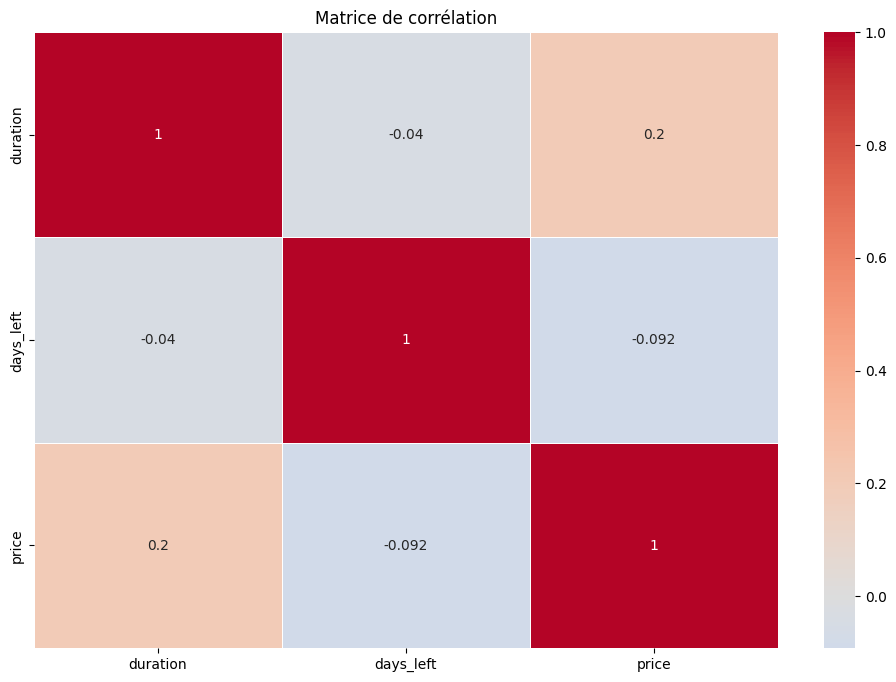

In [14]:
df_num = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

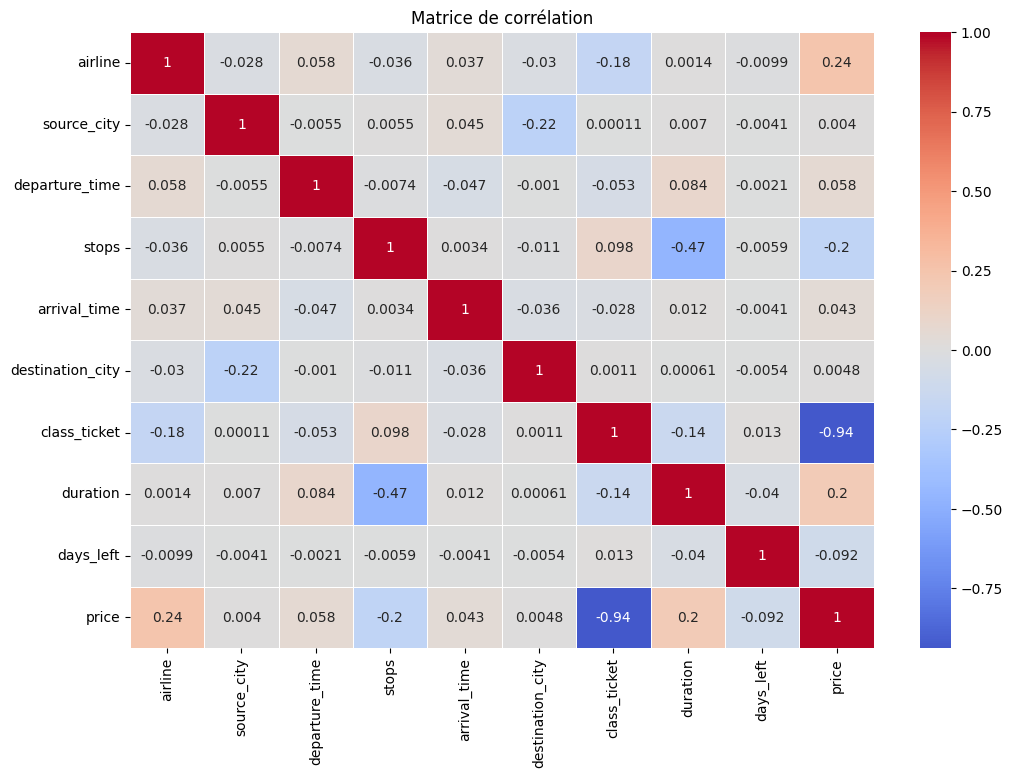

In [17]:
df2 = df.copy()
categorical_cols = df2.select_dtypes(include=['object', 'string']).columns
for col in categorical_cols:
    le = OrdinalEncoder()
    df2[col] = le.fit_transform(df2[[col]])

plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

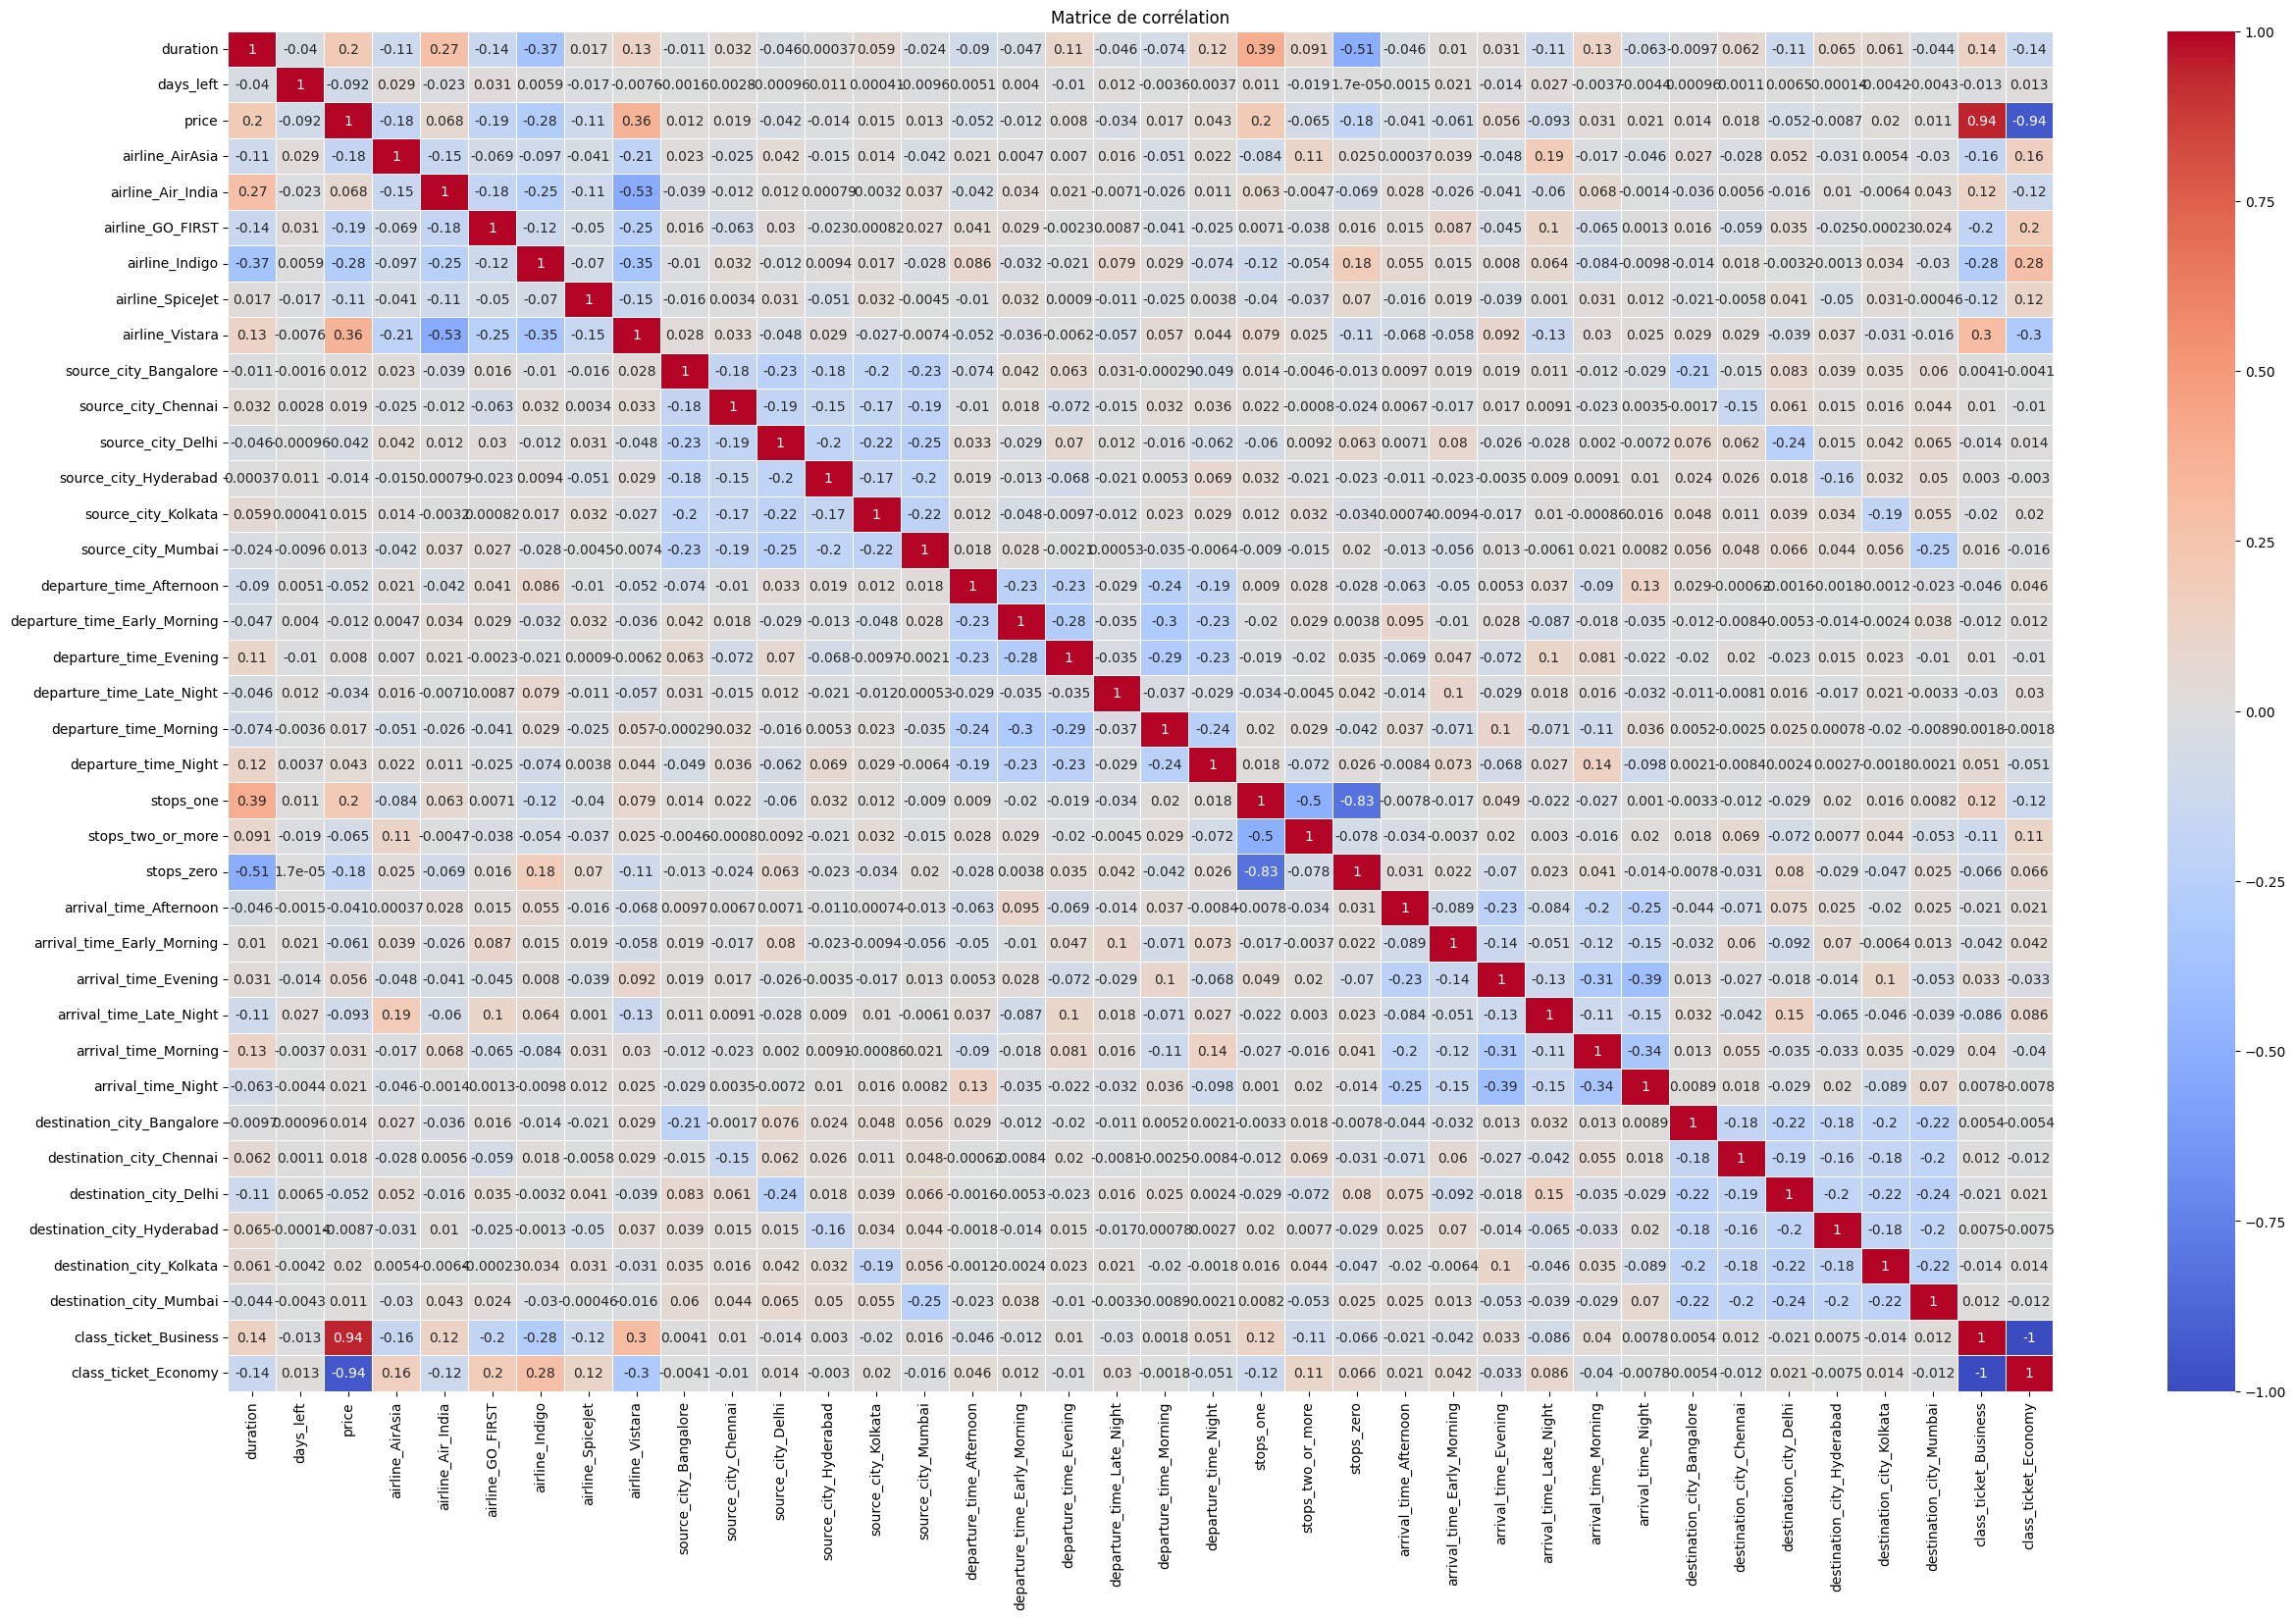

In [18]:
df3 = df.copy()
#encode les variables catégorielles using one hot encoder
categorical_cols = df3.select_dtypes(include=['object', 'string']).columns
df3 = pd.get_dummies(df3, columns=categorical_cols)

plt.figure(figsize=(30, 18))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [19]:
print(df.columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class_ticket', 'duration', 'days_left', 'price'],
      dtype='str')


In [20]:
X = df.drop(columns=['price'])
y = df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Test with ONLY the 'class' feature
X_only_class = pd.get_dummies(X_train[['class_ticket']], drop_first=True)
X_only_class_test = pd.get_dummies(X_test[['class_ticket']], drop_first=True)

# Train a simple model with only class
simple_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
simple_model.fit(X_only_class, y_train)

# Predict and evaluate
y_pred_simple = simple_model.predict(X_only_class_test)
r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print(f"Model with ONLY 'class' feature:")
print(f"  R² Score: {r2_simple:.4f}")
print(f"  RMSE: {rmse_simple:.2f}")
print(f"\nIf R² > 0.9, the model relies heavily on 'class' and may not learn fine pricing details.")

Model with ONLY 'class' feature:
  R² Score: 0.8790
  RMSE: 7881.91

If R² > 0.9, the model relies heavily on 'class' and may not learn fine pricing details.


## Test: Does 'class' feature dominate the model?
If the model already achieves high R² using ONLY the 'class' feature, it means the model is learning mainly "Business → expensive, Economy → cheap" without capturing fine pricing structure.

In [23]:
num_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object', 'string']).columns

num_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
], verbose=True)

cat_process = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
], verbose=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_preprocess, num_cols),
        ("cat", cat_process, categorical_cols)
    ], remainder='passthrough', 
    verbose_feature_names_out=False
)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf)
], verbose=True)

In [24]:
print(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())],
                                                           verbose=True),
                                                  Index(['duration', 'days_left'], dtype='str')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
            

In [25]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 2) Processing imputer, total=   1.0s
[Pipeline] ........... (step 2 of 2) Processing encoder, total=   0.4s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.5s
[Pipeline] ............. (step 2 of 2) Processing model, total= 7.6min
RMSE: 2729.7654656813793
R²: 0.9854922234990644


In [26]:
imputer = pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['imputer']
imputer_categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['imputer']
print(dict(zip(num_cols, imputer.statistics_)))
print(dict(zip(categorical_cols, imputer_categories.statistics_)))

{'duration': np.float64(11.33), 'days_left': np.float64(26.0)}
{'airline': 'Vistara', 'source_city': 'Delhi', 'departure_time': 'Morning', 'stops': 'one', 'arrival_time': 'Night', 'destination_city': 'Mumbai', 'class_ticket': 'Economy'}


In [27]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
rf_model = pipeline.named_steps['model']
importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
print(importances_df.head(10))

                    feature  importance
36     class_ticket_Economy    0.449151
35    class_ticket_Business    0.431484
0                  duration    0.056524
1                 days_left    0.018647
7           airline_Vistara    0.005029
3         airline_Air_India    0.004918
10        source_city_Delhi    0.003857
31   destination_city_Delhi    0.003263
13       source_city_Mumbai    0.002200
34  destination_city_Mumbai    0.001916


In [28]:
joblib.dump(pipeline, 'random_forest_flight_price.pkl')

['random_forest_flight_price.pkl']

In [29]:
loaded_model = joblib.load('random_forest_flight_price.pkl')
y_pred_loaded = loaded_model.predict(X_test)

print(f"R² Score (loaded model): {r2_score(y_test, y_pred_loaded)}")

R² Score (loaded model): 0.9854922234990644


In [30]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
tree = pipeline.named_steps['model'].estimators_[0]

print(export_text(tree, feature_names=list(feature_names), max_depth=4))

|--- class_ticket_Economy <= 0.50
|   |--- duration <= -1.08
|   |   |--- duration <= -1.44
|   |   |   |--- duration <= -1.49
|   |   |   |   |--- duration <= -1.53
|   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |--- duration >  -1.53
|   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |--- duration >  -1.49
|   |   |   |   |--- source_city_Hyderabad <= 0.50
|   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |--- source_city_Hyderabad >  0.50
|   |   |   |   |   |--- value: [17738.00]
|   |   |--- duration >  -1.44
|   |   |   |--- airline_Air_India <= 0.50
|   |   |   |   |--- duration <= -1.42
|   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |--- duration >  -1.42
|   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |--- airline_Air_India >  0.50
|   |   |   |   |--- duration <= -1.37
|   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |--- duration >  -1.37
|   |   |   |   |  